## A Classification Analysis on Student Knowledge Level
##### Group Project Proposal, DSCI 100 - Section 002

##### Contributers: Tara Treagus, Teevint Prak, Michelle Muller, Ayush Joshi

### Introduction
The K-nearest neighbor machine learning algorithm (k-nn) can be used to classify new inputs in a data set. K-nn works by finding a number of (k) points with the closest distance to the unknown data point. From these points, the majority class will classify the new point as such.

Before classification, first we must preprocess the data set by centering and scaling the data, splitting data into training and testing sets, and using the training set to build a classification model. From this model, the k-nn algorithm is used to answer a predictive question pertaining to our data set.

Predictive Question: based on the degree of study time, the degree of repetition and the exam performance of a student, what is the predicted knowledge level of the student on subject matter?

The User Knowledge Modeling data set from the UCI Machine Learning Repository will be used to answer this question. The data set contains information about students' knowledge about Electrical DC Machines. This is a multivariate data set which includes 6 attributes: the degree of study time for goal object materials (STG), degree of repetition number of user for goal object materials (SCG), degree of study time of user for related objects with goal object (STR), the exam performance of user for related objects with goal object (PEG), exam performance of user for goal objects (LPR) and the knowledge level of user (UNS).


### Preliminary exploratory data analysis

In [3]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(readxl)
source("tests.R")
source("cleanup.R")
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


`summarise()` ungrouping output (override with `.groups` argument)



UNS,n(),Observations
<fct>,<int>,<chr>
very_low,24,n()
High,63,n()
Low,83,n()
Middle,88,n()


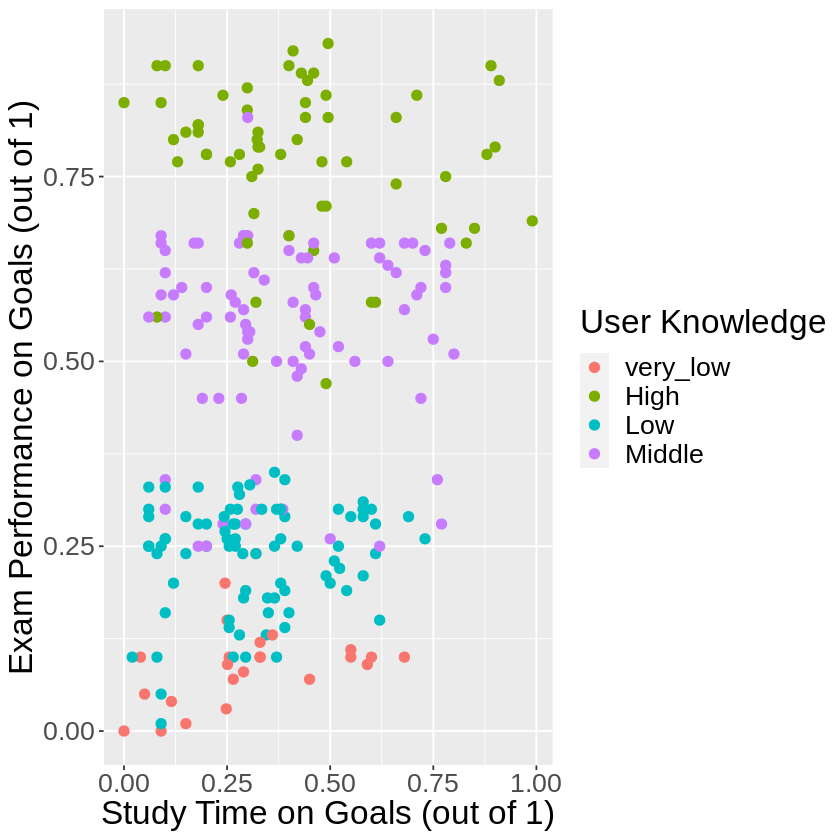

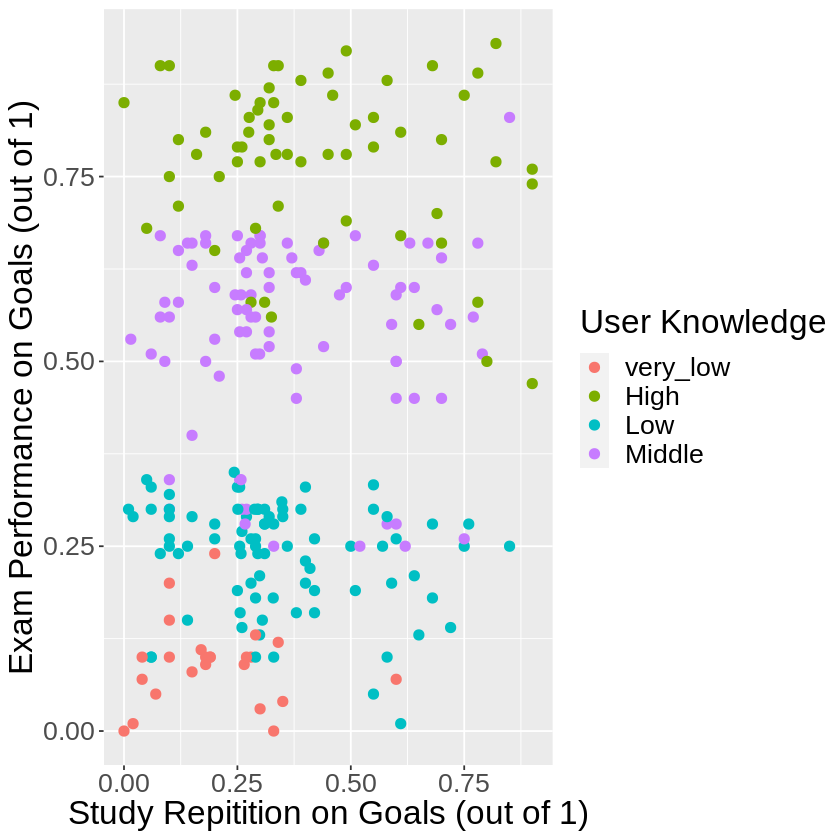

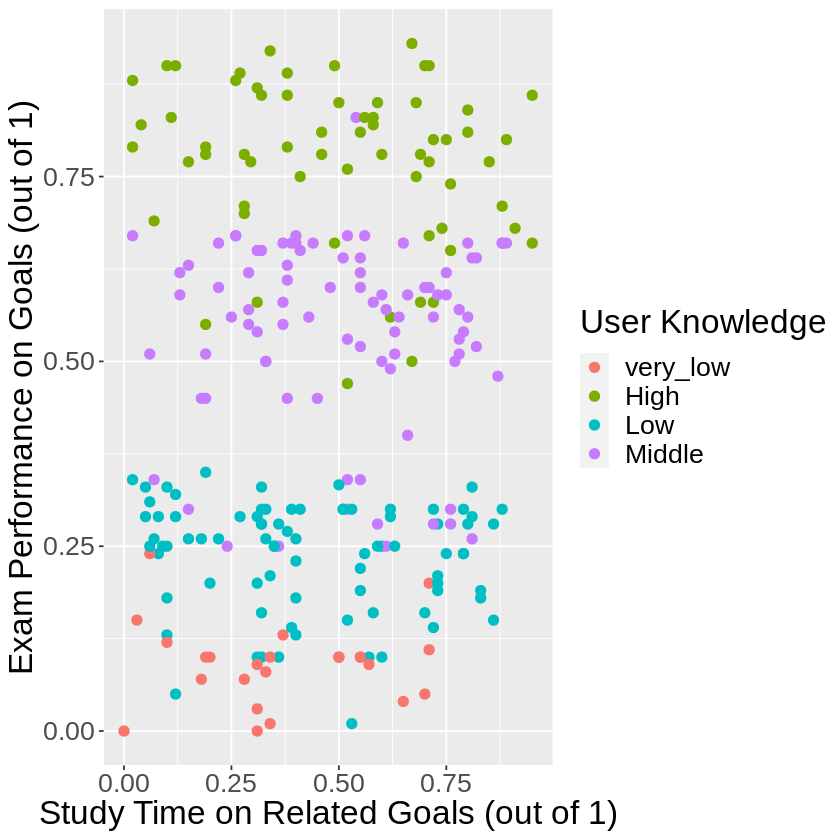

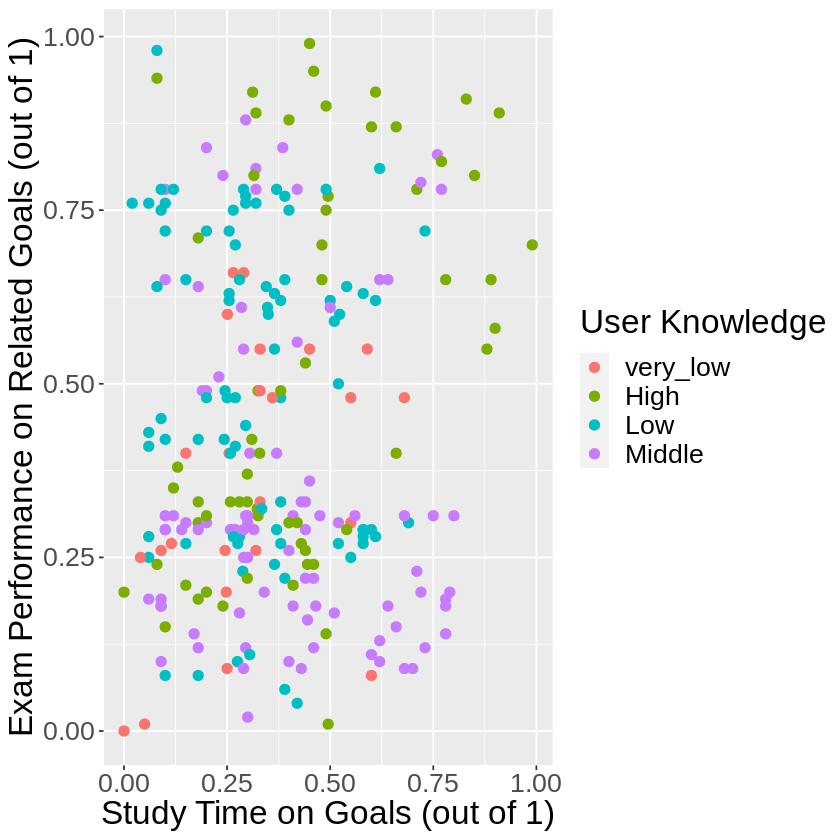

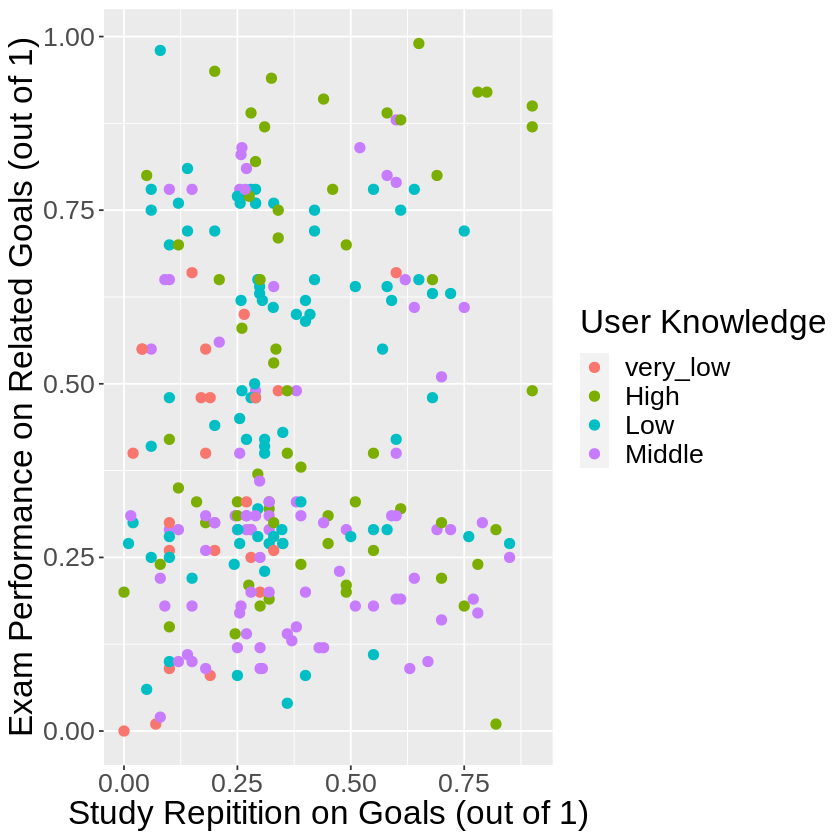

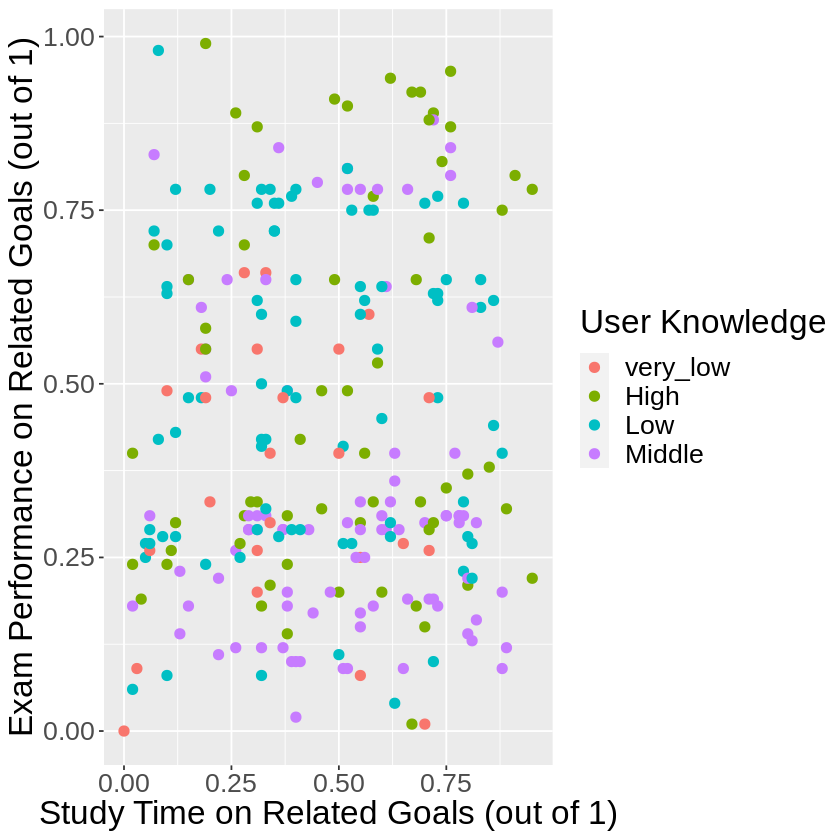

In [17]:
data <- read_xls("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 2) %>%
        select(STG, SCG, STR, LPR, PEG, UNS) %>%
        mutate(UNS = as_factor(UNS))
short_data <- head(data)
short_data
wrangled_data <- group_by(data, UNS) %>% summarize(n()) %>% mutate(Observations = "n()")
wrangled_data

#Study Time on Goals vs Exam Performance on Goals
plot_STGvsPEG <- data %>%  
    ggplot(aes(x=STG,
               y=PEG,
               colour = UNS)) +
        labs(x = "Study Time on Goals (out of 1)",
             y = "Exam Performance on Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_STGvsPEG

#Study Repitition on Goals vs Exam Performance on Goals
plot_SCGvsPEG <- data %>%  
    ggplot(aes(x=SCG,
               y=PEG,
               colour = UNS)) +
        labs(x = "Study Repitition on Goals (out of 1)",
             y = "Exam Performance on Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_SCGvsPEG

#Study Time on Related Goals vs Exam Performance on Goals
plot_STRvsPEG <- data %>%  
    ggplot(aes(x=STR,
               y=PEG,
               colour = UNS)) +
        labs(x = "Study Time on Related Goals (out of 1)",
             y = "Exam Performance on Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_STRvsPEG

#Study Time on Goals vs Exam Performance on Goals
plot_STGvsLPR <- data %>%  
    ggplot(aes(x=STG,
               y=LPR,
               colour = UNS)) +
        labs(x = "Study Time on Goals (out of 1)",
             y = "Exam Performance on Related Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_STGvsLPR

#Study Repitition on Goals vs Exam Performance on Related Goals
plot_SCGvsLPR <- data %>%  
    ggplot(aes(x=SCG,
               y=LPR,
               colour = UNS)) +
        labs(x = "Study Repitition on Goals (out of 1)",
             y = "Exam Performance on Related Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_SCGvsLPR

#Study Time on Related Goals vs Exam Performance on Related Goals
plot_STRvsLPR <- data %>%  
    ggplot(aes(x=STR,
               y=LPR,
               colour = UNS)) +
        labs(x = "Study Time on Related Goals (out of 1)",
             y = "Exam Performance on Related Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_STRvsLPR

### Methods

In our analysis, we are going to explore the relationship between STG, SCG, STR, PEG, LPR, and UNS to build our model. The model will be used to predict the user knowledge (UNS) for new data points based on the predictors (STG, SCG, STR, PEG, and LPR).

We decided to use a scatter plot to visualize the data because it identifies trends and makes classification easier. We will plot the exam performance on the Y-axis (either PEG or LPR) and one of the remaining predictors on the X-axis. We will use this relationship to determine the UNS. Although the plot with the strongest relationship seems to be PEG vs STG, we will not disregard the other predictors yet because we believe that they still influence the UNS, thus we will explore the relationship carefully.

### Expected outcomes and significance

We currently expect that a higher score in each attribute related to study time, repetition and exam performance will correspond to a higher level of knowledge of the student.

Findings from this analysis could help students and faculty members make valuable and realistic predictions on the knowledge level students achieved when completing a course by assessing these attributes. These predictions could give insight beyond test scores of how well material was retained.

This analysis could lead to future questions such as, could we predict which attribute has a more significant impact on the level of knowledge to inform students which area is more valuable to focus on, and would be more successful? Another question could be does user knowledge begin to decrease after a certain amount of time past the course completion?